In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [4]:
# Импортируем наши данные и преобразовавыем в датафрейм ибо мне так легче работать 
df1 = np.loadtxt("C:/Users/fourz/OneDrive/Рабочий стол/ЗМС/6/2.txt")
df = pd.DataFrame(df1, columns = ['values'])
df.describe()

,values
count,64.000000
mean,25.391917
std,18.235633
min,-14.715103
25%,14.577191
50%,22.311293
75%,42.895399
max,61.382194


# Оценим визульно с чем нам прийдеться работать

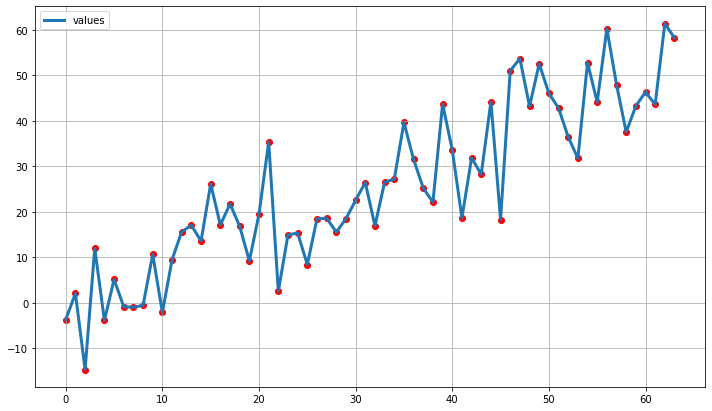

In [5]:
df.plot(figsize=(12, 7), linewidth=3)
plt.scatter(df.index, df["values"], c="r")
plt.legend()
plt.grid()

### Нулевая гипотеза Дики-Фуллера состоит в том, что существует единичный корень, а альтернативная: что единичного корня нет.

Значения p получены с помощью аппроксимации поверхности регрессии из MacKinnon 1994, но с использованием обновленных таблиц 2010 года. Если значение p близко к значительному, то критические значения следует использовать для определения того, следует ли отклонять нулевую гепотезу.

In [6]:
def dicki_Fuller(data):
    test = sm.tsa.adfuller(data)
    
    print ('p-value: ', test[1])
    print ('Critical values: ', test[4])
    
    
    if test[0] > test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')


dicki_Fuller(df)

p-value:  0.6879199086428271
Critical values:  {'1%': -3.542412746661615, '5%': -2.910236235808284, '10%': -2.5927445767266866}
есть единичные корни, ряд не стационарен


In [7]:
# ax = plt.figure(figsize = (12, 5))
# sm.graphics.tsa.plot_acf(df.values, lags=40)

## Простое скользящее среднее: SMA рассчитывается путем взятия невзвешенного среднего из k (размер окна) наблюдений за время, которое присутствует в текущем окне. Он используется для анализа тенденций.

<Figure size 15000x7000 with 0 Axes>

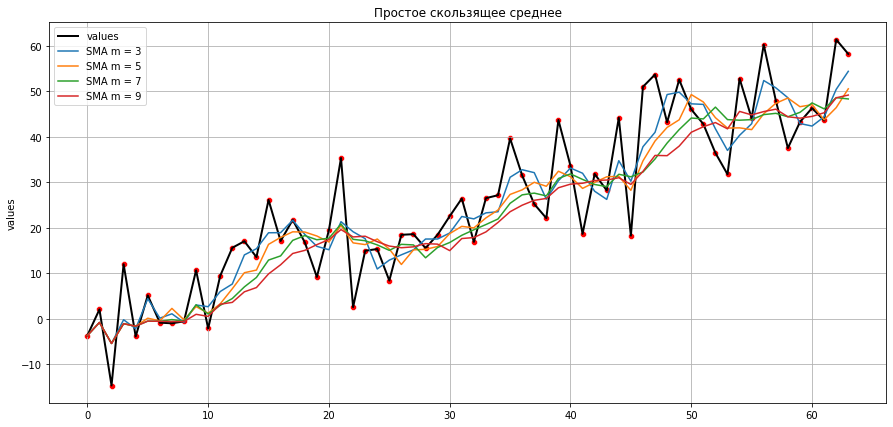

In [8]:
def SMA_plot(data):
    plt.figure(figsize=(15, 7), dpi=1000)
    data.plot(figsize=(15, 7), linewidth=2, color="black")
    lst = [3, 5, 7, 9]
    
    # Строим уже сглаженные графики по SMA
    sns.scatterplot(x = data.index, y = data['values'], color = "r")
    plt.plot(data["values"].rolling(window=lst[0], min_periods=1).mean(), label='SMA m = 3')
    plt.plot(data["values"].rolling(window=lst[1], min_periods=1).mean(), label='SMA m = 5')
    plt.plot(data["values"].rolling(window=lst[2], min_periods=1).mean(), label='SMA m = 7')
    plt.plot(data["values"].rolling(window=lst[3], min_periods=1).mean(), label='SMA m = 9')
    
    plt.grid()
    plt.title('Простое скользящее среднее')
    plt.legend()
    
SMA_plot(df)

## Мы получаем WMA путем умножения каждого числа в наборе данных на заранее определенный вес и суммирования полученных значений.

In [9]:
def wma(arr, period):
    kernel = np.arange(period, 0, -1)
    kernel = np.concatenate([np.zeros(period - 1), kernel / kernel.sum()])
    return np.convolve(arr, kernel, 'same')

### Взвешенная скользящая средняя (WMA) - это технический индикатор, который присваивает больший вес самым последним точкам данных и меньший вес точкам данных.

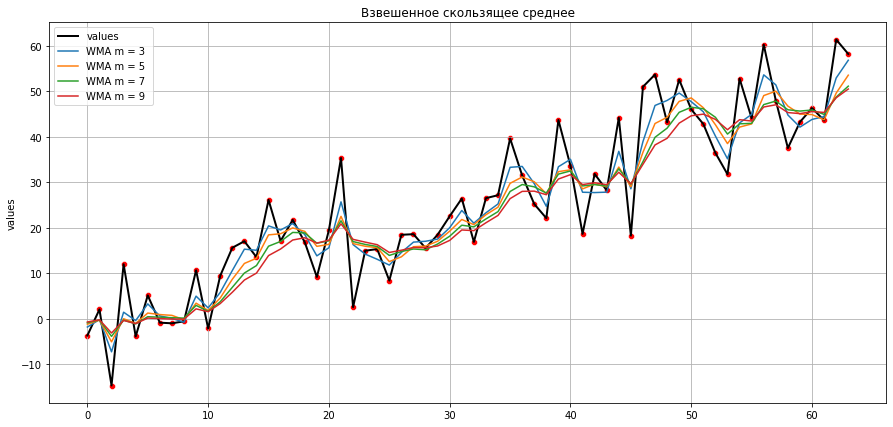

In [10]:
def WMA_PLOT(data):
    data.plot(figsize=(15, 7), linewidth=2, color="black")
    sns.scatterplot(x=data.index, y=data['values'], color="r")
    lst = [3, 5, 7, 9]
    
    # Сглаженные графики по WMA
    plt.plot(wma(data['values'], lst[0]), label='WMA m = 3 ')
    plt.plot(wma(data['values'], lst[1]), label='WMA m = 5 ')
    plt.plot(wma(data['values'], lst[2]), label='WMA m = 7 ')
    plt.plot(wma(data['values'], lst[3]), label='WMA m = 9')
    
    plt.grid()
    plt.title('Взвешенное скользящее среднее')
    plt.legend()
    
WMA_PLOT(df)

## Вес каждого элемента постепенно уменьшается с течением времени, что означает, что экспоненциальное скользящее среднее придает больший вес последним точкам данных. Это делается в соответствии с идеей, что последние данные более актуальны, чем старые данные.

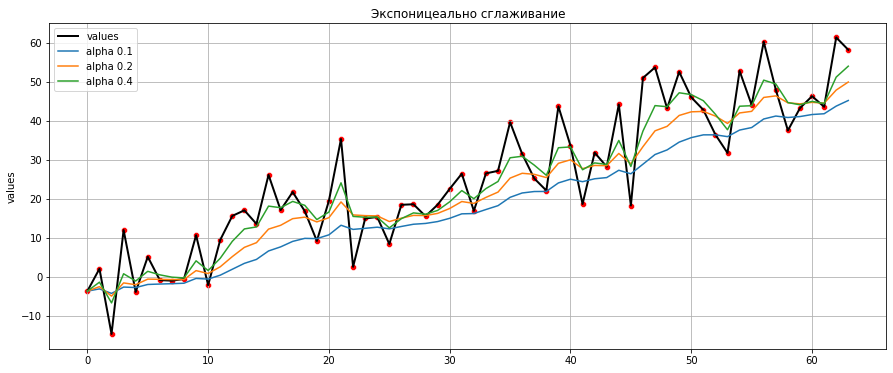

In [11]:
def EMA_plots(data):
    data.plot(figsize=(15, 6), color="black", linewidth=2,)
    sns.scatterplot(x=data.index, y=data['values'], color="r", alpha=1)
    
    # Сглаженные графики по EMA
    plt.plot(data["values"].ewm(alpha=0.1, adjust=False).mean(), label="alpha 0.1")
    plt.plot(data["values"].ewm(alpha=0.2, adjust=False).mean(), label="alpha 0.2")
    plt.plot(data["values"].ewm(alpha=0.4, adjust=False).mean(), label="alpha 0.4")
    
    plt.grid()
    plt.title('Экспоницеально сглаживание')
    plt.legend()
    
EMA_plots(df)    

## DEMA = 2 * EMA(n) - EMA(EMA(n))

In [12]:
def DEMA(data, alpha):
    EMA = data["values"].ewm(alpha=alpha, adjust=False).mean()
    DEMA = 2 * EMA - EMA.ewm(alpha=alpha, adjust=False).mean()
    return DEMA

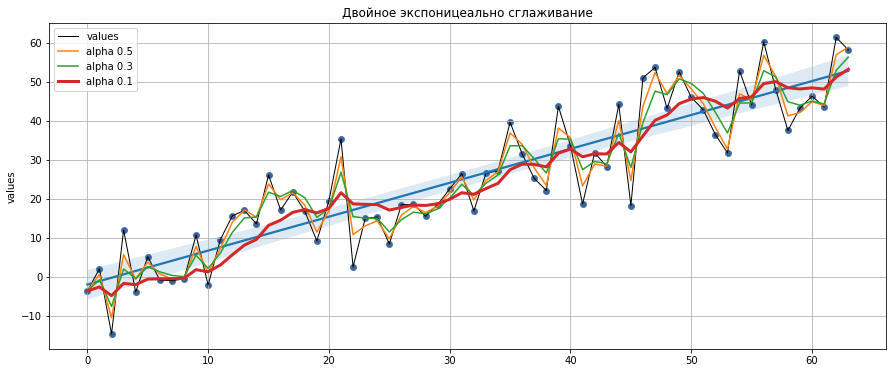

In [13]:
def DEMA_plots(data):
    data.plot(figsize=(15, 6), color="black", linewidth=1)
    sns.scatterplot(x=data.index, y=data['values'], color="r", alpha=1)
    
    sns.regplot(x=df.index, y=df.values) # Регрессионная прямая
    
    # Сглаженные графики по DEMA 
    plt.plot(DEMA(df, 0.5), label="alpha 0.5")
    plt.plot(DEMA(df, 0.3), label="alpha 0.3")
    plt.plot(DEMA(df, 0.1), label="alpha 0.1", linewidth=3)
    
    plt.grid()
    plt.title('Двойное экспоницеально сглаживание')
    plt.legend()
    
DEMA_plots(df)    

In [14]:
# alpha = 0.1
# exp_r = [df['values'][0]]
# for i in range(1, len(df['values'])):
#     exp_r.append(alpha * df['values'][i] + (1 - alpha) * exp_r[i - 1])

In [15]:
# plt.plot(exp_r)
# plt.plot(df["values"])

## Для проведения Q-теста Льюинга Бокса нам нужно расчитать остатки для каждого из методов используя в качестве значения окна "5"

In [16]:
def resid_e(data):
    choise_e = input()
    if choise_e == "sma":
        e1 = data.values - data.rolling(5, min_periods= 1).mean()
        return e1
    elif choise_e == "wma":
        e2 = data["values"] - wma(data['values'], 5)
        return e2
    elif choise_e == "ema":
        e3 = data['values'] - data["values"].ewm(alpha=0.1, adjust=False).mean()
        return e3
    elif choise_e == "dema":
        e4 = data['values'] - DEMA(data, 0.1)
        return e4
    else:
        return 0

### H0 : Остатки распределяются независимо
### H1 : Остатки не распределяются независимо, они демонстрируют последовательную корреляцию

In [17]:
def Q_TEST():
    Q_test = sm.stats.acorr_ljungbox(resid_e(df), lags=[5])
    
    if (Q_test.lb_pvalue.iloc[0] > 0.05 and Q_test.lb_pvalue.iloc[0] < 1):
        txt = "При значение {} мы склонны остаться с нулевой гипотезой"
        return print(txt.format(Q_test.lb_pvalue.iloc[0]))
    
    else:
        txt2 = "При значение {} мы склонны отклонить нулевую гипотезу"
        return print(txt2.format(Q_test.lb_pvalue.iloc[0]))
Q_TEST()

dema
При значение 0.9706345641132165 мы склонны остаться с нулевой гипотезой


## Вроде нужно провести тест Дарбина-Утсона хз на васякий сделал


In [18]:
model = sm.OLS.from_formula("df.values ~ df.index",  data = df)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              df.values   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sat, 10 Dec 2022   Prob (F-statistic):           1.16e-22
Time:                        13:51:15   Log-Likelihood:                -226.24
No. Observations:                  64   AIC:                             456.5
Df Residuals:                      62   BIC:                             460.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.0230      2.083     -0.971      0.335      -6.188       2.142
df.index       0.8703      0.057     15.255      0.000       0.756       0.984
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.763
Skew:                           0.077   Prob(JB):                        0.683
Kurtosis:                       2.488   Cond. No.                         72.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""